## Cluster Analysis

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib import cm 
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,  dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
df1 = pd.read_csv("dane1.csv")
df2 = pd.read_csv("dane2.csv")

Analysis of df1 dataset and segments

In [3]:
df1.head()

,zmienna1,zmienna2
0,-3.855139,-5.446715
1,6.760673,-8.654504
2,2.763912,0.442152
3,-0.933838,-4.004030
4,2.629042,0.485640


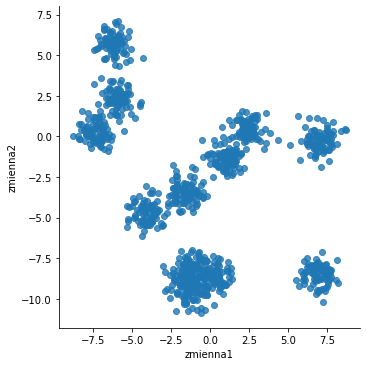

In [4]:
sns.lmplot(data=df1, x='zmienna1', y='zmienna2', fit_reg=False )

In [8]:
#K-means algorithm 
kmeans=KMeans(n_clusters=10, init='k-means++', n_init=20, max_iter=400)
kmeans.fit(df1)
y_kmeans=kmeans.predict(df1)
df1['clusters'] = y_kmeans
centers = kmeans.cluster_centers_

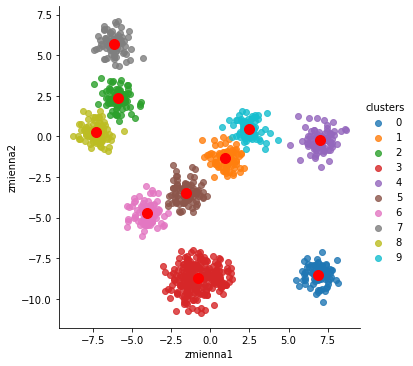

In [10]:
#segments visualization

sns.lmplot(data=df1, x='zmienna1', y='zmienna2', hue='clusters', fit_reg=False)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

Text(0.5, 1.0, 'Plot of inertia')

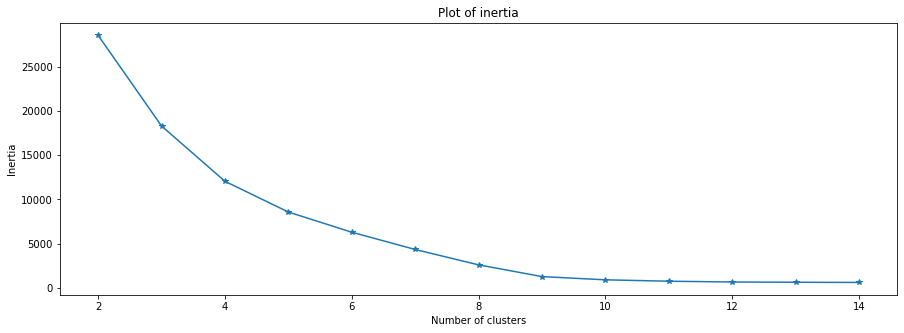

In [13]:
#Measures on the plots
inercja = []
silhouette = []

for i in range(2,15):
    kmeans=KMeans(n_clusters=i, n_init=20, max_iter=400)
    kmeans.fit(df1)
    inercja.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df1, kmeans.predict(df1)))
    
plt.figure(figsize=(15,5))
plt.plot(range(2,15), inercja, marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Plot of inertia')

Text(0.5, 1.0, 'Silhouette score')

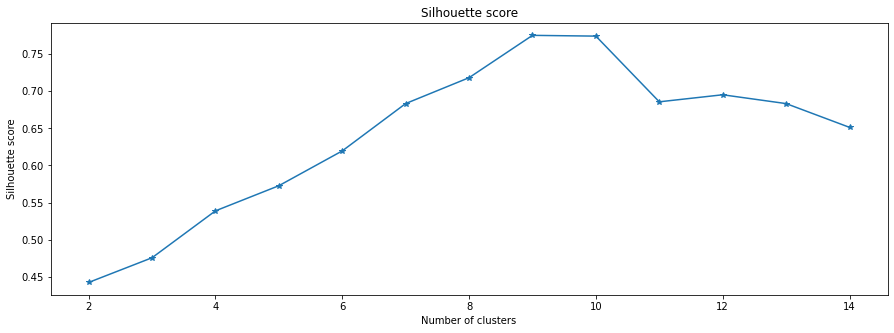

In [15]:
plt.figure(figsize=(15,5))
plt.plot(range(2,15), silhouette, marker="*")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette score")

In [19]:
silhouette

[0.442396248273536,
 0.4756520616407345,
 0.5388314851232581,
 0.5726855216303521,
 0.6195835657785799,
 0.6833661409716938,
 0.7182165650193608,
 0.7752415758417129,
 0.7742116126478126,
 0.6857218109664962,
 0.6952025900030321,
 0.6833178815440332,
 0.6513082592608821]

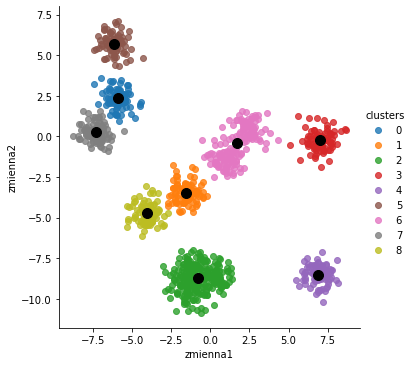

In [18]:
# 9 clusters seem to be ok as well

kmeans=KMeans(n_clusters=9, n_init=20, max_iter=400 )
kmeans.fit(df1)
y_kmeans = kmeans.predict(df1)
df1['clusters'] = y_kmeans
centers = kmeans.cluster_centers_
sns.lmplot(data=df1, x='zmienna1', y='zmienna2', hue='clusters', fit_reg=False)
plt.scatter(centers[:, 0], centers[:,1], marker="o", color='black', s=100)

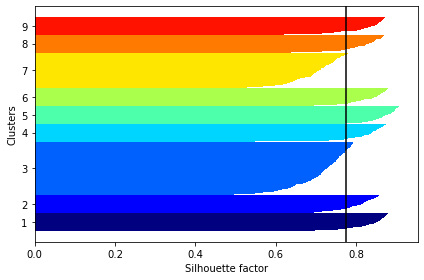

In [24]:
#Silhouette for observations
labels = np.unique(y_kmeans)
n_clusters = len(labels)
silhouette_vals = silhouette_samples(df1, y_kmeans, metric='euclidean')

axis_y_lower, axis_y_upper = 0, 0
yticks = []
for i, c in enumerate(labels):
    c_silhouette_vals = silhouette_vals[y_kmeans==c]
    c_silhouette_vals.sort()
    axis_y_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(axis_y_lower, axis_y_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((axis_y_lower + axis_y_upper) / 2)
    axis_y_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="black", linestyle="-") 

plt.yticks(yticks, labels + 1)
plt.ylabel('Clusters')
plt.xlabel('Silhouette factor')

plt.tight_layout()


Analysis of df2 dataset and segments

In [27]:
df2.head()

,zmienna1,zmienna2
0,0.805593,-0.059103
1,-0.142914,-0.756025
2,-0.816182,-0.605252
3,0.598393,0.495808
4,-0.456047,0.661383


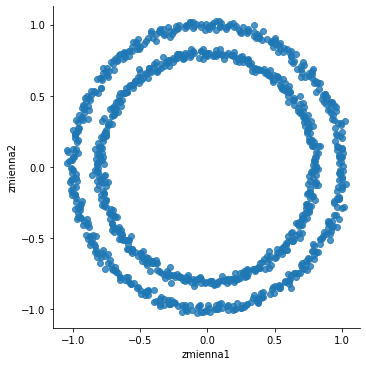

In [28]:
sns.lmplot(data=df2, x='zmienna1', y='zmienna2', fit_reg=False)

Kmeans method is not suitable for segments in circle shape.
Hierarchical (Agglomeration) methods are better in this case. 

In [29]:
agglomeration_single = linkage(df2, method='single', metric='euclidean')
agglomeration_complete = linkage(df2, method='complete', metric='euclidean')
agglomeration_avg = linkage(df2, method='average', metric='euclidean')
agglomeration_ward = linkage(df2, method='ward', metric='euclidean')

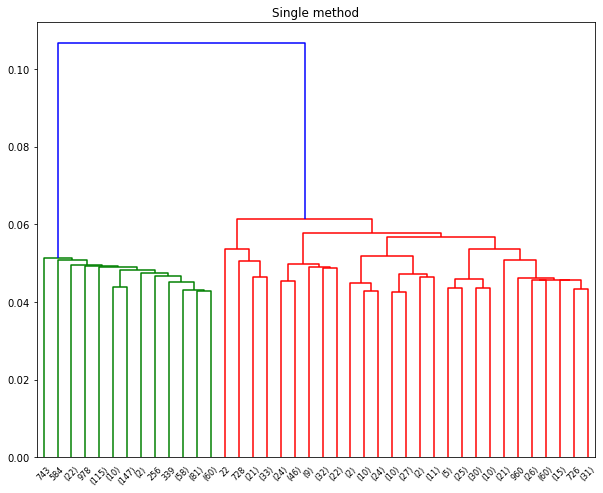

In [32]:
plt.figure(figsize=(10,8))
dendrogram(agglomeration_single, truncate_mode='lastp', p=40)
plt.title("Single method")

Text(0.5, 1.0, 'Complete method')

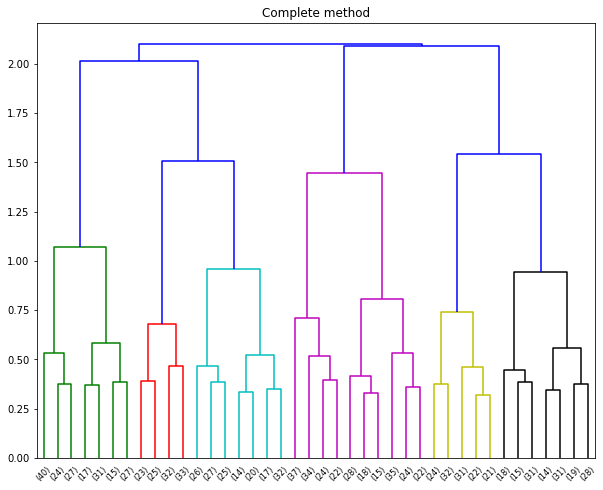

In [33]:
plt.figure(figsize=(10,8))
dendrogram(agglomeration_complete, truncate_mode='lastp', p=40)
plt.title("Complete method")

Text(0.5, 1.0, 'Average method')

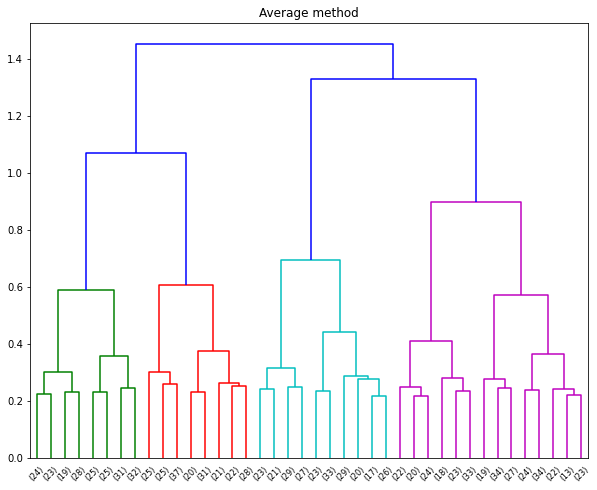

In [34]:
plt.figure(figsize=(10,8))
dendrogram(agglomeration_avg, truncate_mode='lastp', p=40)
plt.title("Average method")

Text(0.5, 1.0, 'Ward method')

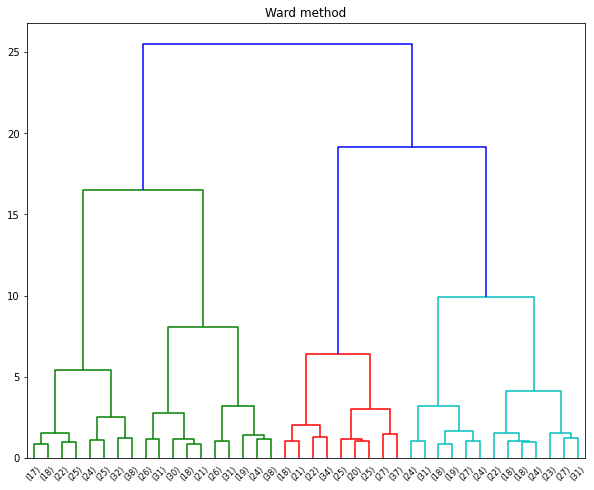

In [35]:
plt.figure(figsize=(10,8))
dendrogram(agglomeration_ward, truncate_mode='lastp', p=40)
plt.title("Ward method")

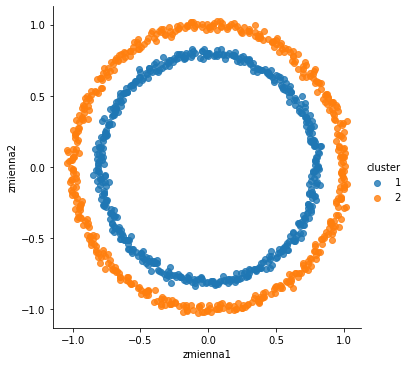

In [57]:
#Single method
df2['cluster'] = fcluster(agglomeration_single, 2, criterion='maxclust')
sns.lmplot(data=df2, x='zmienna1', y='zmienna2', hue="cluster", fit_reg=False)


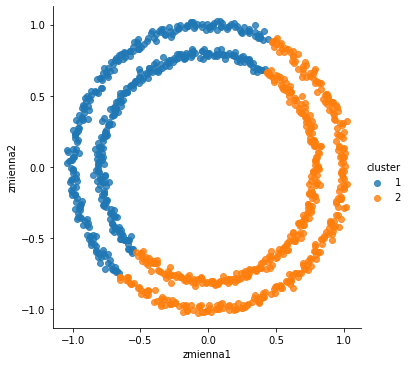

In [58]:
#Single method
df2['cluster'] = fcluster(agglomeration_ward, 2, criterion='maxclust')
sns.lmplot(data=df2, x='zmienna1', y='zmienna2', hue="cluster", fit_reg=False)

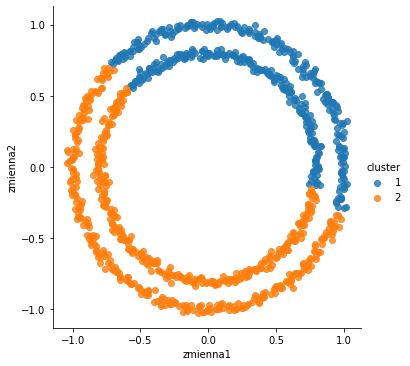

In [59]:
#Single method
df2['cluster'] = fcluster(agglomeration_avg, 2, criterion='maxclust')
sns.lmplot(data=df2, x='zmienna1', y='zmienna2', hue="cluster", fit_reg=False)

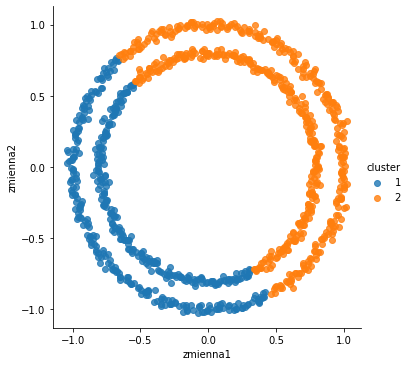

In [60]:
#Single method
df2['cluster'] = fcluster(agglomeration_complete, 2, criterion='maxclust')
sns.lmplot(data=df2, x='zmienna1', y='zmienna2', hue="cluster", fit_reg=False)